In [3]:
# pip install kaggle
import kaggle

Downloading dataset directly from Kaggle API

In [4]:
!kaggle datasets download prasad22/healthcare-dataset -f healthcare_dataset.csv

Dataset URL: https://www.kaggle.com/datasets/prasad22/healthcare-dataset
License(s): CC0-1.0




  0%|          | 0.00/2.91M [00:00<?, ?B/s]
 34%|###4      | 1.00M/2.91M [00:00<00:00, 5.33MB/s]
100%|##########| 2.91M/2.91M [00:00<00:00, 10.8MB/s]
100%|##########| 2.91M/2.91M [00:00<00:00, 9.72MB/s]


Since zip folder is download, I am using below code to extract the actual file

In [3]:
import zipfile
extracted_file = zipfile.ZipFile('healthcare_dataset.csv.zip') 
extracted_file.extractall()
extracted_file.close() 

In [1]:
import pandas as pd
df = pd.read_csv('healthcare_dataset.csv')
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


## Exploratory Data Analysis <br>
### Data cleaning

In [2]:
df.columns=df.columns.str.replace(' ','_')

In [3]:
df['Name'] = df['Name'].apply(lambda x: ' '.join([word.capitalize() for word in x.split()]))
df.head(2)

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
print("\nUnique Values in Categorical Columns:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].nunique()}")


Unique Values in Categorical Columns:
Name: 40235
Gender: 2
Blood_Type: 8
Medical_Condition: 6
Date_of_Admission: 1827
Doctor: 40341
Hospital: 39876
Insurance_Provider: 5
Admission_Type: 3
Discharge_Date: 1856
Medication: 5
Test_Results: 3


In [8]:
# Convert 'Date of Admission' to datetime if it's not already
df['Date_of_Admission'] = pd.to_datetime(df['Date_of_Admission'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Date_of_Admission'])

# Create a time series by grouping data by month
monthly_admissions = df['Date_of_Admission'].dt.to_period('M').value_counts().sort_index()


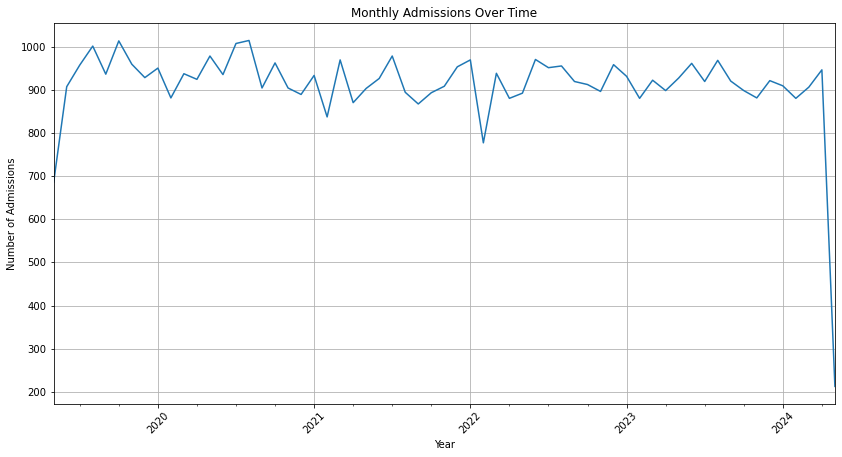

In [18]:
# Plotting the time series of monthly admissions
plt.figure(figsize=(14, 7))
monthly_admissions.plot()
plt.title('Monthly Admissions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

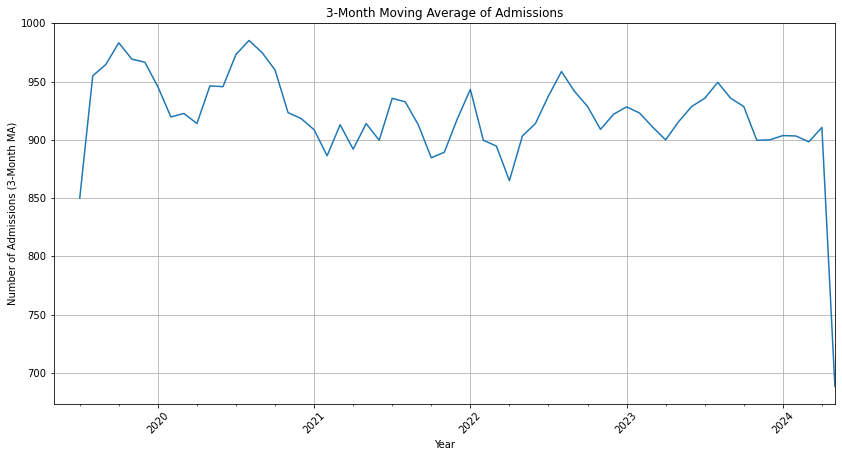

In [19]:
# Plotting a moving average to smooth the time series
plt.figure(figsize=(14, 7))
monthly_admissions.rolling(window=3).mean().plot()
plt.title('3-Month Moving Average of Admissions')
plt.xlabel('Year')
plt.ylabel('Number of Admissions (3-Month MA)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


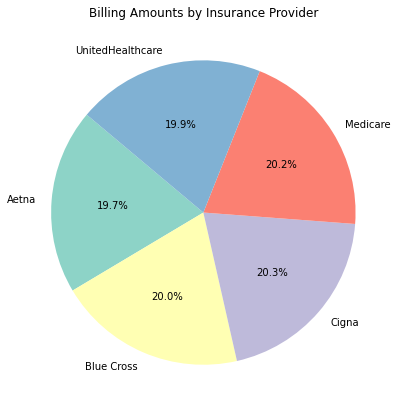

In [20]:
insurance_billing = df.groupby('Insurance_Provider')['Billing_Amount'].sum()

# Plotting the pie chart of Insurance Providers and their total billing amounts
plt.figure(figsize=(10, 7))
plt.pie(insurance_billing, labels=insurance_billing.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', n_colors=len(insurance_billing)))
plt.title('Billing Amounts by Insurance Provider')
plt.show()

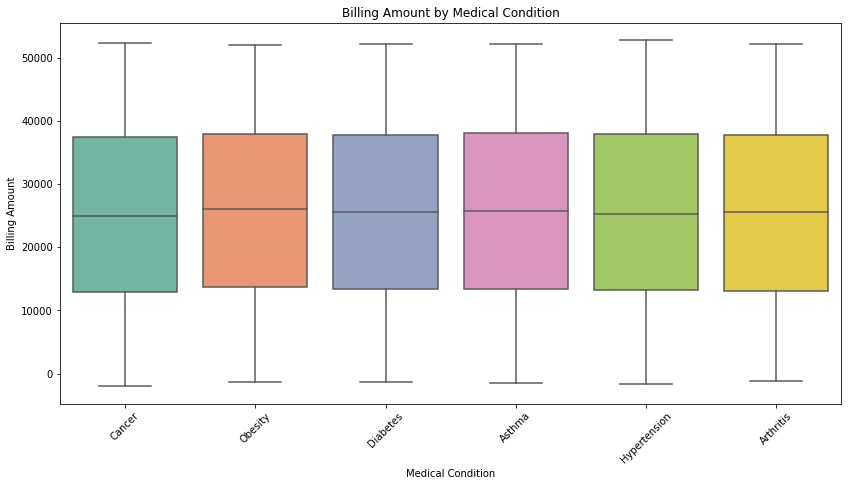

In [12]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Medical_Condition', y='Billing_Amount', data=df, palette='Set2')
plt.title('Billing Amount by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.show()

## Implementation of ARIMA model

In [14]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Monthly admissions data (already aggregated in the previous step)
monthly_admissions = df['Date_of_Admission'].dt.to_period('M').value_counts().sort_index()

# Convert to a time series object
monthly_admissions_ts = monthly_admissions.to_timestamp()


In [15]:
# Fit an ARIMA model
arima_model = ARIMA(monthly_admissions_ts, order=(2, 1, 2))  # (p, d, q) order
arima_result = arima_model.fit()

# Forecast the next 12 months
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)


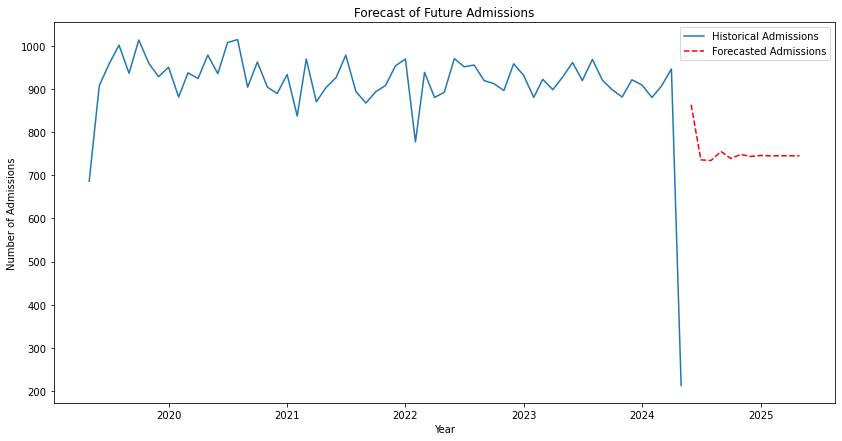

In [17]:
# Plot the historical data and forecast
plt.figure(figsize=(14, 7))
plt.plot(monthly_admissions_ts, label='Historical Admissions')
plt.plot(forecast, label='Forecasted Admissions', linestyle='--', color='red')
plt.title('Forecast of Future Admissions')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.legend()
plt.show()